# SMS Spam Detection
### Using multinomial naive bayes

In [109]:
import pandas as pd
import numpy as np
import nltk

from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Imports

In [7]:
DF_SMS = pd.read_csv("spam.csv", encoding = 'latin-1')

In [8]:
DF_SMS.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
DF_SMS.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [10]:
DF_SMS.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis= 1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
DF_SMS_DROP = DF_SMS.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis= 1) # drop down the data of unnamed
DF_SMS_DROP = DF_SMS_DROP.rename(columns={"v1":"label", "v2":"sms"}) # renaming the data

In [12]:
DF_SMS_DROP.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
DF_SMS_DROP['length'] = DF_SMS_DROP['sms'].apply(len)
DF_SMS_DROP.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


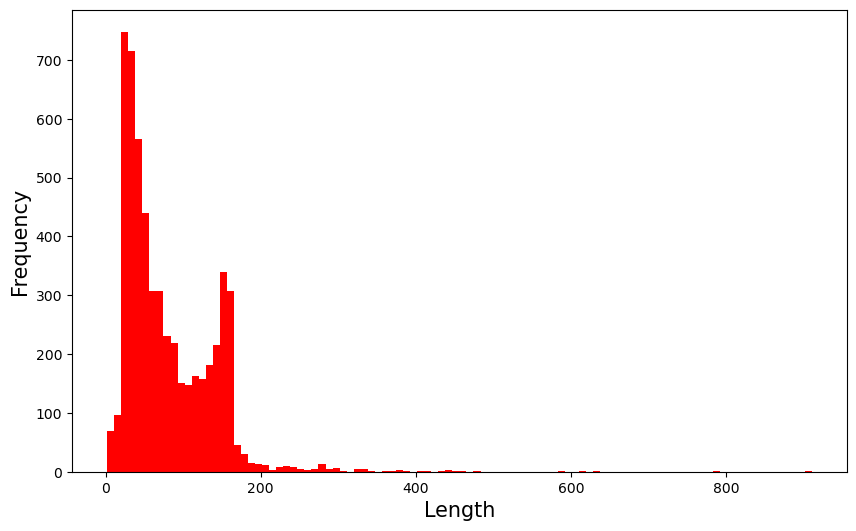

In [111]:
plt.figure(figsize=(10, 6))
DF_SMS_DROP['length'].plot(bins=100, kind='hist', color= 'red')
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Length', fontsize = 15)
plt.show()

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

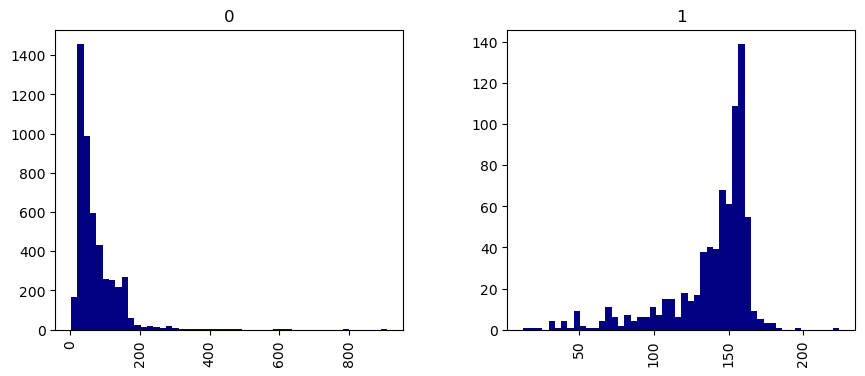

In [119]:
DF_SMS_DROP.hist(column='length', by='label', bins=50,figsize=(10,4), color = 'navy')


In [16]:
DF_SMS_DROP.loc[:,'label'] = DF_SMS_DROP.label.map({'ham':0, 'spam':1})
print(DF_SMS_DROP.shape)
DF_SMS_DROP.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
DF_SMS_DROP['sms'].isnull().values.any() # chacking any sms bodies are null

False

In [19]:
(DF_SMS_DROP.sms.str.len() == 0).any() # checking is there any empty sms string length

False

In [72]:
message = DF_SMS_DROP['sms']
message.describe()

count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: sms, dtype: object

In [28]:
spam = DF_SMS_DROP.label.value_counts()[1]
non_spam = DF_SMS_DROP.label.value_counts()[0]

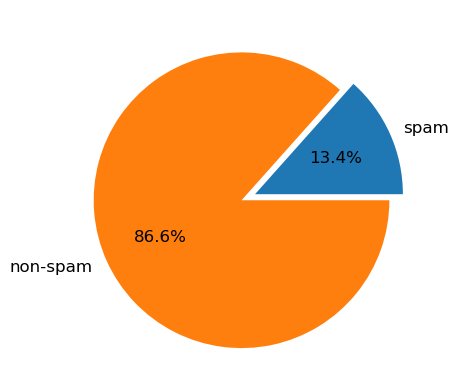

<Figure size 800x800 with 0 Axes>

In [49]:
# creating the pie charts of spam and non-spam SMS
plt.pie([spam, non_spam], labels = ['spam', 'non-spam'], textprops = {'fontsize':12}, startangle = 0, autopct = '%1.01f%%', explode = [0, 0.1])
plt.figure(figsize=(2,2), dpi = 400)
plt.show()

In [78]:
objsmstolist = list(message)

In [82]:
lower_case_documents = []
lower_case_documents = [d.lower() for d in objsmstolist]
print(lower_case_documents)

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...', 'ok lar... joking wif u oni...', "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's", 'u dun say so early hor... u c already then say...', "nah i don't think he goes to usf, he lives around here though", "freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv", 'even my brother is not like to speak with me. they treat me like aids patent.', "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune", 'winner!! as a valued network customer you have been selected to receivea å£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.', 'had your mobil

In [83]:
# removing all punctuation
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though',
 'freemsg hey there darling its been 3 weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send å£150 to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea å£900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only',
 'had your mobile 11 months or more u r entitled to update

In [84]:
# Tokenization
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'ratetcs',
  'apply',
  '08452810075over18s'],
 ['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say'],
 ['nah',
  'i',
  'dont',
  'think',
  'he',
  'goes',
  'to',
  'usf',
  'he',
  'lives',
  'around',
  'here',
  'though'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  'its',
  'been',
  '3',
  'weeks',
  'now',
  'and',
  'no',
  'word',
  'back',
  'id',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',

In [89]:
# counter
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'go': 1,
          'until': 1,
          'jurong': 1,
          'point': 1,
          'crazy': 1,
          'available': 1,
          'only': 1,
          'in': 1,
          'bugis': 1,
          'n': 1,
          'great': 1,
          'world': 1,
          'la': 1,
          'e': 1,
          'buffet': 1,
          'cine': 1,
          'there': 1,
          'got': 1,
          'amore': 1,
          'wat': 1}),
 Counter({'ok': 1, 'lar': 1, 'joking': 1, 'wif': 1, 'u': 1, 'oni': 1}),
 Counter({'to': 3,
          'entry': 2,
          'fa': 2,
          'free': 1,
          'in': 1,
          '2': 1,
          'a': 1,
          'wkly': 1,
          'comp': 1,
          'win': 1,
          'cup': 1,
          'final': 1,
          'tkts': 1,
          '21st': 1,
          'may': 1,
          '2005': 1,
          'text': 1,
          '87121': 1,
          'receive': 1,
          'questionstd': 1,
          'txt': 1,
          'ratetcs': 1,
          'apply': 1,
          '08452810

          'courtroom': 1,
          'lttimegt': 1,
          'am': 1,
          'ill': 1,
          'double': 1,
          'check': 1,
          'and': 1,
          'text': 1,
          'you': 1,
          'again': 1,
          'tomorrow': 1}),
 Counter({'how': 1,
          'will': 1,
          'i': 1,
          'creep': 1,
          'on': 1,
          'you': 1,
          'now': 1}),
 Counter({'tell': 1,
          'your': 1,
          'friends': 1,
          'what': 1,
          'you': 1,
          'plan': 1,
          'to': 1,
          'do': 1,
          'on': 1,
          'valentines': 1,
          'day': 1,
          'lturlgt': 1}),
 Counter({'if': 1,
          'i': 1,
          'get': 1,
          'there': 1,
          'before': 1,
          'you': 1,
          'after': 1,
          'your': 1,
          'ten': 1,
          'billion': 1,
          'calls': 1,
          'and': 1,
          'texts': 1,
          'so': 1,
          'help': 1,
          'me': 1,
          'god': 1}),
 

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [95]:
count_vector.fit(objsmstolist)
count_vector.get_feature_names_out

<bound method CountVectorizer.get_feature_names_out of CountVectorizer()>

In [96]:
doc_array = count_vector.transform(objsmstolist).toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [97]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
X_train, X_test, y_train, y_test = train_test_split(DF_SMS_DROP['sms'], 
                                                    DF_SMS_DROP['label'],test_size=0.20, 
                                                    random_state=1)

In [100]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

In [105]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

In [106]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [107]:
predictions = naive_bayes.predict(testing_data)

In [108]:
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447652
